In [8]:
# Codigo visto en Clase
# Generar todas las listas de longitud k que se pueden formar tomando elements de A (con repetidos)
def variaciones_con_repeticion(a, k):
    if k == 0:
        return [[]]
    else:
        res = []
        for x in a:
            for v in variaciones_con_repeticion(a, k - 1):
                res.append([x] + v)
        return res

print(variaciones_con_repeticion([0, 1], 3))


# Todas las listas de longitud k que se pueden formar tomando elementos de A
def combinaciones_sin_repeticion(a, k):
    if k == 0:
        return [[]]
    elif k > 0 and len(a) == 0:
        return []
    else:
        res = []
        for c in combinaciones_sin_repeticion(a[1:], k - 1): # incluyendo el primer elemento
            res.append([a[0]] + c)
        for c in combinaciones_sin_repeticion(a[1:], k): # sin incluir el primer elemento
            res.append(c)
        return res

print(combinaciones_sin_repeticion([0, 1, 2], 2))


# Una lista con todas las permutaciones de A
def permutaciones(a):
    if len(a) == 0:
        return [[]]
    else:
        res = []
        primero = a[0]
        cola = a[1:]
        for p in permutaciones(cola):
            for i in range(len(p) + 1):
                res.append(p[:i] + [primero] + p[i:])
        return res

print(permutaciones([0, 1, 2]))

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[[0, 1], [0, 2], [1, 2]]
[[0, 1, 2], [1, 0, 2], [1, 2, 0], [0, 2, 1], [2, 0, 1], [2, 1, 0]]


In [ ]:
# Ejemplo Backtracking Laberinto
PARED = "█"
VACIO = " "
HILO = "X"

LABERINTO = [
"  ███████████████████████████████████",
"█ █           █         █           █",
"█ █ █████████ █ █████ █ █████ ███████",
"█ █   █ █     █ █     █       █   █ █",
"█ ███ █ █ █████ █ █████████████ ███ █",
"█     █ █       █ █     █   █       █",
"███████ ███████ █ █ ███ █ █ ███ █████",
"█       █       █     █   █   █   █ █",
"█ ███████ ███████████████████ █████ █",
"█         █   █       █       █     █",
"█ █████████ █ █ █ ███ █ ███████ █████",
"█       █   █ █ █ █   █    █        █",
"███████ ███ █ █ █ █ ███ █ ███ █ █████",
"█ █   █     █ █ █ █  █  █ █   █ █   █",
"█ █ █ ███████ ███ ███████ █ ███ █ █ █",
"█   █       █   █ █         █ █   █ █",
"█ ███████ █████ █ █ █████████ █████ █",
"█ █     █ █   █ █ █         █   █   █",
"█ █ ███ █ █ █ █ █ █████████ ███ █ ███",
"█   █   █   █     █             █   █",
"██████████████████████████████████   ",
]

Norte = (-1, 0)
Este = (0, 1)
Sur = (1, 0)
Oeste = (0, -1)

def mostrar(laberinto):
    for linea in laberinto:
        print(''.join(linea))
        
def posicion_final(laberinto):
    filas = len(laberinto)
    columnas = len(laberinto[0])
    return (filas - 1, columnas - 1)

def cae_dentro(laberinto, posicion):
    filas = len(laberinto)
    columnas = len(laberinto[0])
    (i, j) = posicion
    return 0 <= i < filas and 0 <= j < columnas 

def contenido(laberinto, posicion):
    (i, j) = posicion
    return laberinto[i][j]

def marcar(laberinto, posicion, elemento):
    (i, j) = posicion
    laberinto[i][j] = elemento


def resolver(laberinto, posicion):
    if posicion == posicion_final(laberinto):
        return True
    else:
        for direccion in [Norte, Este, Sur, Oeste]:
            proxima = (posicion[0] + direccion[0], posicion[1] + direccion[1])
            if not cae_dentro(laberinto, proxima):
                continue
            elif contenido(laberinto, posicion) in [PARED, HILO]:
                continue
            else:
                marcar(laberinto, posicion, HILO)
                if resolver(laberinto, proxima):
                    return True
                marcar(laberinto, posicion, VACIO)
        return False
                

def main():
    laberinto = [list(l) for l in LABERINTO]
    resolver(laberinto, (0, 0))
    mostrar(laberinto)

main()

XX███████████████████████████████████
█X█XXXXXXXXXXX█XXXXXXX  █           █
█X█X█████████X█X█████X█ █████ ███████
█X█XXX█ █XXXXX█X█XXXXX█       █   █ █
█X███X█ █X█████X█X█████████████ ███ █
█XXXXX█ █XXXXXXX█X█XXXXX█XXX█       █
███████ ███████ █X█X███X█X█X███ █████
█       █       █XXX  █XXX█XXX█   █ █
█ ███████ ███████████████████X█████ █
█         █   █       █XXXXXXX█     █
█ █████████ █ █ █ ███ █X███████ █████
█       █   █ █ █ █   █XXX █ XXX    █
███████ ███ █ █ █ █ ███ █X███X█X█████
█ █   █     █ █ █ █  █  █X█XXX█X█XXX█
█ █ █ ███████ ███ ███████X█X███X█X█X█
█   █       █   █ █      XXX█ █XXX█X█
█ ███████ █████ █ █ █████████ █████X█
█ █     █ █   █ █ █         █   █XXX█
█ █ ███ █ █ █ █ █ █████████ ███ █X███
█   █   █   █     █             █XXX█
██████████████████████████████████ X 


In [12]:
# Ejemplo Backtracking Sudoku
def mostrar(sudoku):
    for linea in sudoku:
        print(linea)

SUDOKU = [
    [0, 0, 0,    2, 6, 0,    7, 0, 1],
    [6, 8, 0,    0, 7, 0,    0, 9, 0],
    [1, 9, 0,    0, 0, 4,    5, 0, 0],

    [8, 2, 0,    1, 0, 0,    0, 4, 0],
    [0, 0, 4,    6, 0, 2,    9, 0, 0],
    [0, 5, 0,    0, 0, 3,    0, 2, 8],

    [0, 0, 9,    3, 0, 0,    0, 7, 4],
    [0, 4, 0,    0, 5, 0,    0, 3, 6],
    [7, 0, 3,    0, 1, 8,    0, 0, 0],
]

def fila(sudoku, i):
    return sudoku[i]

def columna(sudoku, j):
    return [sudoku[i][j] for i in range(9)]

def cuadrante(sudoku, i, j):
    i0 = (i // 3) * 3
    j0 = (j // 3) * 3
    return [sudoku[i0 + di][j0 + dj] for di in range(3) for dj in range(3)]

def proxima_posicion(posicion):
    (i, j) = posicion
    if j < 8:
        return (i, j + 1)
    else:
        return (i + 1, 0)


def resolver(sudoku, posicion):
    if posicion == (9, 0):
        return sudoku
    (i, j) = posicion
    if sudoku[i][j] != 0:
        return resolver(sudoku, proxima_posicion(posicion))
    for digito in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
        if digito in fila(sudoku, i): continue
        if digito in columna(sudoku, j): continue
        if digito in cuadrante(sudoku, i, j): continue
        sudoku[i][j] = digito
        if resolver(sudoku, proxima_posicion(posicion)) is not None:
            return sudoku
        sudoku[i][j] = 0
    return None

mostrar(resolver(SUDOKU, (0,0)))      
        

[4, 3, 5, 2, 6, 9, 7, 8, 1]
[6, 8, 2, 5, 7, 1, 4, 9, 3]
[1, 9, 7, 8, 3, 4, 5, 6, 2]
[8, 2, 6, 1, 9, 5, 3, 4, 7]
[3, 7, 4, 6, 8, 2, 9, 1, 5]
[9, 5, 1, 7, 4, 3, 6, 2, 8]
[5, 1, 9, 3, 2, 6, 8, 7, 4]
[2, 4, 8, 9, 5, 7, 1, 3, 6]
[7, 6, 3, 4, 1, 8, 2, 5, 9]


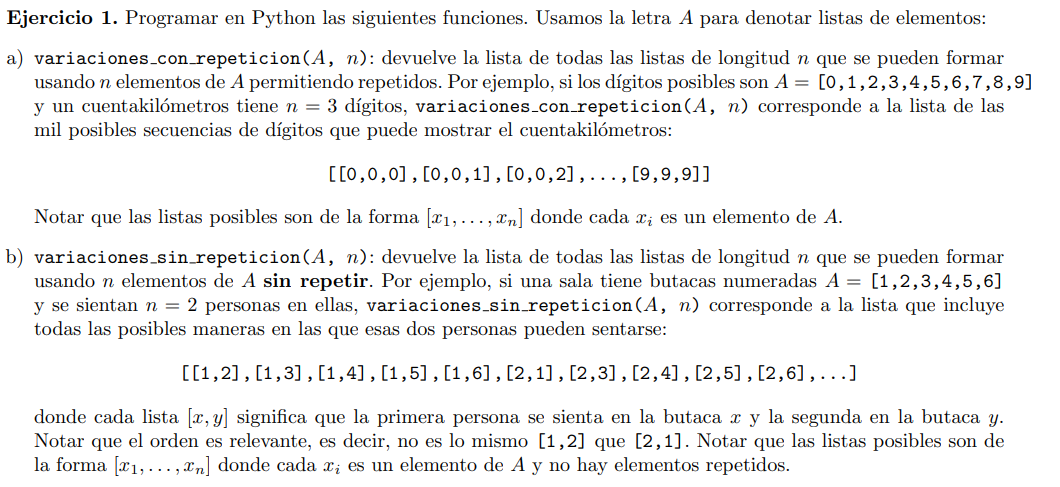

In [4]:
a = [0,1,2,3,4,5,6,7,8,9]
n = 2

def variaciones_con_repeticion(a, n):
    if n == 0:
        return [[]]
    else:
        res = []
        for x in a:
            for v in variaciones_con_repeticion(a, n - 1):
                res.append([x] + v)
        return res

print(variaciones_con_repeticion(a,n))

def variaciones_sin_repeticion(a, n):
    if n == 0:
        return [[]]
    elif n > 0 and len(a) == 0:
        return []
    else:
        res = []
        for c in variaciones_sin_repeticion(a[1:], n - 1): # incluyendo el primer elemento
            res.append([a[0]] + c)
        for c in variaciones_sin_repeticion(a[1:], n): # sin incluir el primer elemento
            res.append(c)
        return res

print(variaciones_sin_repeticion(a,n))

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [9, 0], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9]]
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 4]

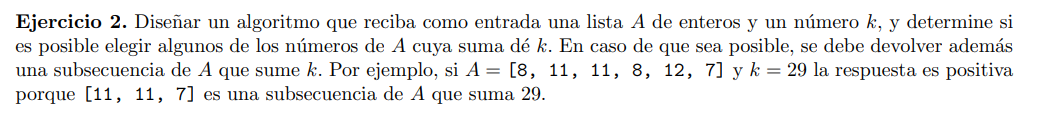

In [ ]:
def subset_sum(a, k):
    if k == 0:
        return []
    elif len(a) == 0:
        return None
    else:
        #opcion 1 incluyo al elemento [0]
        res = subset_sum(a[1:], k - a[0])
        if res is not None:
            return [a[0]] + res
        #opcion 2 no incluyo el elemento[0]
        return subset_sum(a[1:], k)

a = [8,11,11,8,12,7]
k = 29

print(subset_sum(a,k))
        

[11, 11, 7]


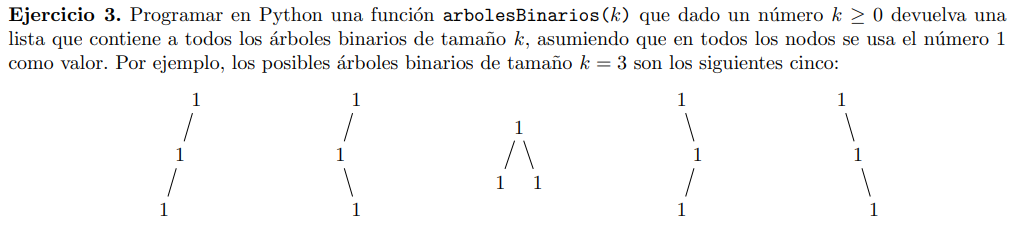

In [ ]:
class Nodo:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right


def arbolesBinarios(k):
    if k == 0:
        return [None]
    else:
        res = []
        for i in range(k):
            for izq in arbolesBinarios(i):
                for der in arbolesBinarios(k - 1 - i):
                    res.append(Nodo(izq, 1, der))
        return res

In [1]:
# Ejercicio 4

def listas_que_suman(k):
    if k == 0:
        return [[]]
    res = []
    for primero in range(1, k + 1):
        for complemento in  listas_que_suman(k - primero):
            lista = [primero] + complemento
            res.append(lista)
    return res

print(listas_que_suman(4))

[[1, 1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 3], [2, 1, 1], [2, 2], [3, 1], [4]]
